# Dose–Response Relationships  

## Tasks 
Within this notebook you will:  

1) Examine and interpret a dose-response dataset of PC9 lung adenocarcinoma cells harboring EGFR-ex19del and several derived sublines using Thunor.  
2) Compare 72 h viability vs DIP rate-based dose-response curves of all cell lines treated with afatinib
2) Download the data and perform analyses on subsets of the data using Python  
3) Compare   
4)   


You can learn more about Thunor web and how to use it in [this tutorial](https://youtu.be/q4LQCjuBnmg).  


## Dose–response relationships  

Task 1) 
Got to [thunor.app.vanderbilt.edu](thunor.app.vanderbilt.edu) and open the HTS001 dataset
Compare the responses of all cell lines to afatinib using activity area, observed as the metric for 


In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !pip install thunor

In [2]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import thunor
from thunor.io import read_hdf
from thunor.dip import dip_rates
from thunor.curve_fit import fit_params
%matplotlib inline

#### Define model functions

In [3]:
def ll4(x,h,E0,Emax,EC50):
    '''
    Reformulation of the LL4 function
     - h: Hill coefficient
     - E0: no-drug effect
     - Emax: max effect
     - EC50: Concentration at midpoint between E0 and Emax
     '''
    return(Emax + (E0-Emax) / (1+np.exp(h*(np.log(x/EC50)))) )

def viability(x,b,d,e):
    '''
    3-parameter log-logistic function with no effect set to a value of 1
     - b: Hill coefficient
     - d: Emax
     - e: EC50
     '''
    return(d + (1-d) / ( 1+np.exp( b*np.log(x/e)) ) )

#### Load all PC9 data using Thunor

In [4]:
if IN_COLAB and not os.path.exists("./data/HTS001.h5"):
    if not os.path.exists("./data"):
        !mkdir data
    !wget -O ./data/HTS001.h5 https://github.com/VU-CSP/quantbio-assignments/raw/main/data/HTS001.h5
    
if not IN_COLAB and not os.path.exists("./data/HTS001.h5"):
    print("HTS001.h5 not found. Attempting to download")
    

#### Description of HTS001.h5 dataset  

* PC9 lung adenocarcinoma cell line and six PC9 variants, each treated with 14 different drugs
* All cell lines were genetically modified to express a nuclear-localized fluorescent protein (H2BmRFP) and assessed by live-cell fluorescence microscopy in multiwell plates
* No cell death indicator was used in these experiments (i.e., some of the cell counts may be of dead cells that retained fluorescent nuclear signal)

In [5]:
hts001 = read_hdf("./data/HTS001.h5")
hts001

OSError: ``/Users/darren/git-repos/quantbio-assignments/data/HTS001.h5`` does not exist

### Calculate DIP rates and fit parameters for all conditions using Thunor

In [22]:
ctrl_diprates, expt_diprates = dip_rates(hts001)
fit_p = fit_params(ctrl_diprates, expt_diprates)

/usr/local/lib/python3.9/dist-packages/thunor/curve_fit.py:157: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.9/dist-packages/thunor/curve_fit.py:224: RuntimeWarning:

invalid value encountered in double_scalars



In [24]:
fit_p.head()

dip_ctrl  \
dataset_id cell_line drug                                                          
13         BR1       afatinib  dose          well_id
1.868750e-12  54148     ...   
           DS3       afatinib  dose          well_id
1.868750e-12  54456     ...   
           DS7       afatinib  dose          well_id
1.868750e-12  54764     ...   
           DS8       afatinib  dose          well_id
1.868750e-12  55072     ...   
           DS9       afatinib  dose          well_id
1.868750e-12  55380     ...   

                                                                        dip_expt  \
dataset_id cell_line drug                                                          
13         BR1       afatinib  dose          well_id
1.868750e-11  53868     ...   
           DS3       afatinib  dose          well_id
1.868750e-11  54176     ...   
           DS7       afatinib  dose          well_id
1.868750e-11  54484     ...   
           DS8       afatinib  dose          well_id
1.868750e-11  54792     ...   
           DS9       afatinib  dose          well_id
1.868750e-11  55100     ...   

                                                                         fit_obj  \
dataset_id cell_line drug                                                          
13         BR1       afatinib  <thunor.curve_fit.HillCurveLL4 object at 0x7f3...   
           DS3       afatinib  <thunor.curve_fit.HillCurveLL4 object at 0x7f3...   
           DS7       afatinib  <thunor.curve_fit.HillCurveLL4 object at 0x7f3...   
           DS8       afatinib  <thunor.curve_fit.HillCurveLL4 object at 0x7f3...   
           DS9       afatinib  <thunor.curve_fit.HillCurveLL4 object at 0x7f3...   

                               min_dose_measured  max_dose_measured  emax_obs  \
dataset_id cell_line drug                                                       
13         BR1       afatinib       1.868750e-12           0.000004 -0.016577   
           DS3       afatinib       1.868750e-12           0.000004 -0.011857   
           DS7       afatinib       1.868750e-12           0.000004 -0.015582   
           DS8       afatinib       1.868750e-12           0.000004 -0.011272   
           DS9       afatinib       1.868750e-12           0.000004 -0.011257   

                                 aa_obs          label          ic50  \
dataset_id cell_line drug                                              
13         BR1       afatinib  1.512939  BR1\nafatinib  3.006719e-07   
           DS3       afatinib  5.548105  DS3\nafatinib  3.034130e-11   
           DS7       afatinib  4.355910  DS7\nafatinib  5.993042e-11   
           DS8       afatinib  3.708655  DS8\nafatinib  9.443298e-11   
           DS9       afatinib  4.820104  DS9\nafatinib  4.533335e-11   

                                       ec50      emax       einf  emax_rel  \
dataset_id cell_line drug                                                    
13         BR1       afatinib  3.968750e-06 -0.007034 -22.244175 -0.221182   
           DS3       afatinib  3.630411e-11 -0.004809  -0.004809 -0.139991   
           DS7       afatinib  5.188016e-11  0.004615   0.004615  0.118395   
           DS8       afatinib  7.862445e-11  0.006191   0.006191  0.154127   
           DS9       afatinib  4.868199e-11 -0.002011  -0.002011 -0.055564   

                               emax_obs_rel        aa           auc      hill  
dataset_id cell_line drug                                                      
13         BR1       afatinib     -0.521250  1.522150  10006.926303  0.346485  
           DS3       afatinib     -0.345116  5.738045      1.474794  1.375790  
           DS7       afatinib     -0.399753  4.305049      1.272956  1.873320  
           DS8       afatinib     -0.280602  3.978123      1.373802  2.011579  
           DS9       afatinib     -0.311075  5.181684      1.496975  1.478611

Get only data using afatinib

In [6]:
# afat = hts001.filter(drugs=['afatinib'])
# afat

HTS Dataset (1 drugs/combos, 7 cell lines)

In [ ]:
# if not os.path.exists("./data/hts001_diprates.tsv"):
#     !wget -O "./data/hts001_diprates.tsv" https://thunor.app.vanderbilt.edu/dataset/13/download/dip_rates

--2023-03-15 21:52:29--  https://thunor.app.vanderbilt.edu/dataset/13/download/dip_rates
Resolving thunor.app.vanderbilt.edu (thunor.app.vanderbilt.edu)... 54.90.175.126, 34.202.141.124, 184.72.201.10, ...
Connecting to thunor.app.vanderbilt.edu (thunor.app.vanderbilt.edu)|54.90.175.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173629 (170K) [text/tab-separated-values]
Saving to: ‘./data/hts001_diprates.tsv’

./data/hts001_dipra 100%[===================>] 169.56K  --.-KB/s    in 0.01s   

2023-03-15 21:52:29 (14.0 MB/s) - ‘./data/hts001_diprates.tsv’ saved [173629/173629]



## Save the data as a pandas DataFrame and read in to visualize

/usr/local/lib/python3.9/dist-packages/thunor/curve_fit.py:157: RuntimeWarning:

invalid value encountered in log



well_num         plate  \
dataset drug        cell_line dose           well_id                           
13      (afatinib,) BR1       (1.86875e-11,) 53868          93  HTS001_BR1-2   
                                             53869         261  HTS001_BR1-2   
                              (7.47625e-11,) 53870          92  HTS001_BR1-2   
                                             53871         260  HTS001_BR1-2   
                              (3.0525e-10,)  53872          91  HTS001_BR1-2   
...                                                        ...           ...   
                    PC9       (2.48e-07,)    55731         254  HTS001_PC9-2   
                              (9.92125e-07,) 55732          85  HTS001_PC9-2   
                                             55733         253  HTS001_PC9-2   
                              (3.96875e-06,) 55734          84  HTS001_PC9-2   
                                             55735         252  HTS001_PC9-2   

                                                      dip_rate  \
dataset drug        cell_line dose           well_id             
13      (afatinib,) BR1       (1.86875e-11,) 53868    0.029535   
                                             53869    0.028068   
                              (7.47625e-11,) 53870    0.028230   
                                             53871    0.029678   
                              (3.0525e-10,)  53872    0.029814   
...                                                        ...   
                    PC9       (2.48e-07,)    55731    0.012725   
                              (9.92125e-07,) 55732    0.008165   
                                             55733    0.010411   
                              (3.96875e-06,) 55734   -0.016326   
                                             55735   -0.013625   

                                                      dip_fit_std_err  \
dataset drug        cell_line dose           well_id                    
13      (afatinib,) BR1       (1.86875e-11,) 53868           0.000915   
                                             53869           0.000787   
                              (7.47625e-11,) 53870           0.000882   
                                             53871           0.000935   
                              (3.0525e-10,)  53872           0.001067   
...                                                               ...   
                    PC9       (2.48e-07,)    55731           0.001306   
                              (9.92125e-07,) 55732           0.000423   
                                             55733           0.000857   
                              (3.96875e-06,) 55734           0.001950   
                                             55735           0.001250   

                                                      dip_first_timepoint  \
dataset drug        cell_line dose           well_id                        
13      (afatinib,) BR1       (1.86875e-11,) 53868                   31.1   
                                             53869                   48.5   
                              (7.47625e-11,) 53870                   48.5   
                                             53871                   48.5   
                              (3.0525e-10,)  53872                   51.8   
...                                                                   ...   
                    PC9       (2.48e-07,)    55731                   19.0   
                              (9.92125e-07,) 55732                   53.0   
                                             55733                   25.7   
                              (3.96875e-06,) 55734                   46.4   
                                             55735                   19.0   

                                                      dip_y_intercept  
dataset drug        cell_line dose           well_id                   
13      (afatinib,) BR1       (1.86875e-11,) 53868        

In [27]:
fit_p_afat = fp[fp.index.isin(['afatinib'], level='drug')]
plot_drc(fit_p_afat)

In [29]:
plot_drc(fit_p[fit_p.index.isin(['BR1'], level='cell_line') & \
               fit_p.index.isin(['paclitaxel'], level='drug')])

AttributeError: ignored

In [15]:
br1_afat = afat.filter(cell_lines=['BR1'])

In [14]:
from thunor.plots import plot_drc, plot_drc_params, plot_time_course, plot_ctrl_dip_by_plate, plot_plate_map

plot_time_course(br1_afat)

In [ ]:
from pandas.io.parsers.readers import read_csv
if not os.path.exists("./data/afatinib.csv"):
    thunor.io.write_vanderbilt_hts(afat, filename="./data/afatinib.csv")
a = read_csv("./data/afatinib.csv")
a.rename(columns={'cell.line': 'cell_line', 'cell.count': 'cell_count', 'drug1.conc': 'drug1_conc'}, inplace=True)
a.head()


,drug1,cell_line,drug1_conc,well,upid,time,cell_count,drug1.units
0,afatinib,BR1,1.868750e-11,D22,HTS001_BR1-2,5.7,49.0,M
1,afatinib,BR1,1.868750e-11,D22,HTS001_BR1-2,9.0,59.0,M
2,afatinib,BR1,1.868750e-11,D22,HTS001_BR1-2,21.1,93.0,M
3,afatinib,BR1,1.868750e-11,D22,HTS001_BR1-2,24.4,100.0,M
4,afatinib,BR1,1.868750e-11,D22,HTS001_BR1-2,27.8,115.0,M


In [ ]:
grouped = a.groupby(['cell_line'])

#### Perform nonlinear regression on data using the `ll4` model  
Let's first look at each of the dates independently to assess consistency.  
#### Use `scipy.optimize.curve_fit` to perform nonlinear regression (fit model parameters)  
Fit data from each date independently.  

In [ ]:
fitRawData = []
for name, group in grouped:
    fitCoefs, covMatrix = opt.curve_fit(ll4, group.drug1_conc, np.log2(group.cell_count))
    resids = group.cell_count-group.drug1_conc.apply(lambda x: ll4(x,*fitCoefs))
    curFit = dict(zip(['h','E0','Emax','EC50'],fitCoefs))
    curFit['exptDate']=name
    curFit['residuals']=sum(resids**2)
    fitRawData.append(curFit)
    
fitRawData

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


RuntimeError: ignored

#### Plot the data and predicted model fits using Seaborn

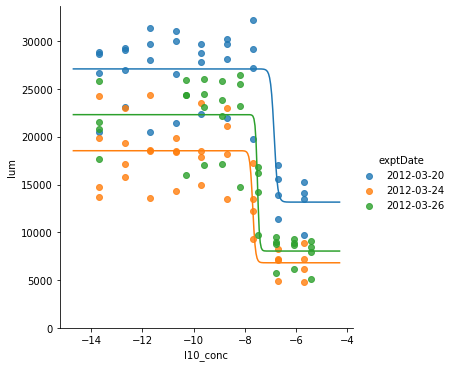

In [ ]:
b = sns.lmplot(x='l10_conc', y='lum', data=p, hue='exptDate',fit_reg=False)
b.set(ylim=(0, None))
for fit in fitRawData:
    l = sns.lineplot(x=[i for i in myconc], y=[ll4(10**i,*[fit[i] for i in ['h','E0','Emax','EC50']]) for i in myconc], legend=False)

#### Perform nonlinear regression on data using `viability` model  
Use `resp_ratio` values. 

In [ ]:
fitRatioData = []
for name, group in grouped:
    fitCoefs, covMatrix = opt.curve_fit(viability, group.conc, group.resp_ratio, p0=[1,0,1e-7])
    resids = group.resp_ratio-group.conc.apply(lambda x: viability(x,*fitCoefs))
    curFit = dict(zip(['b','d','e'],fitCoefs))
    curFit['exptDate']=name
    curFit['residuals']=sum(resids**2)
    fitRatioData.append(curFit)
    
fitRatioData

/Users/darren/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'b': 10.352896185165806,
  'd': 0.5027940960627816,
  'e': 1.617765596079996e-07,
  'exptDate': '2012-03-20',
  'residuals': 0.6157521512932839},
 {'b': 8.705902672064543,
  'd': 0.37510324802784983,
  'e': 2.0499371978441175e-08,
  'exptDate': '2012-03-24',
  'residuals': 0.9761750322879311},
 {'b': 12.019204784622994,
  'd': 0.37413802405342866,
  'e': 3.159539337736448e-08,
  'exptDate': '2012-03-26',
  'residuals': 0.7381374312834317}]

In [ ]:
#### Plot the data and predicted model fits using Seaborn

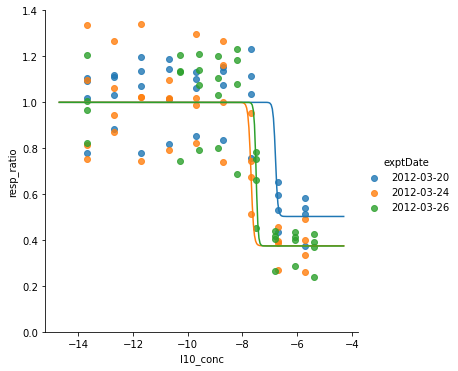

In [ ]:
a = sns.lmplot(x='l10_conc', y='resp_ratio', data=p, hue='exptDate',fit_reg=False)
a.set(ylim=(0, 1.4))
for fit in fitRatioData:
    l = sns.lineplot(x=[i for i in myconc], y=[viability(10**i,*[fit[i] for i in ['b','d','e']]) for i in myconc], legend=False)

In [ ]:
m = p[["l10_conc","resp_ratio"]].groupby(['l10_conc']).agg(['mean', 'std'])
m = m.xs('resp_ratio', axis=1, drop_level=True)
m.reset_index(inplace=True)
m['conc'] = 10**m['l10_conc']
m

,l10_conc,mean,std,conc
0,-13.699,1.000000,0.180392,1.999862e-14
1,-12.699,1.036115,0.134687,1.999862e-13
2,-11.699,1.039790,0.199748,1.999862e-12
3,-10.699,1.010883,0.142711,1.999862e-11
4,-10.291,1.054499,0.210896,5.116818e-11
5,-9.699,1.034374,0.152811,1.999862e-10
6,-9.592,1.055267,0.182893,2.558586e-10
7,-8.893,1.034929,0.171832,1.279381e-09
8,-8.699,1.046473,0.177480,1.999862e-09
9,-8.194,1.046552,0.247222,6.397348e-09


#### Fit ll4 model to resp_ratio means


In [ ]:
fitCoefs, covMatrix = opt.curve_fit(viability, m['conc'], m['mean'], p0=[1,0,1e-7])

#### Plot the data and predicted curve

<AxesSubplot:xlabel='l10_conc', ylabel='mean'>

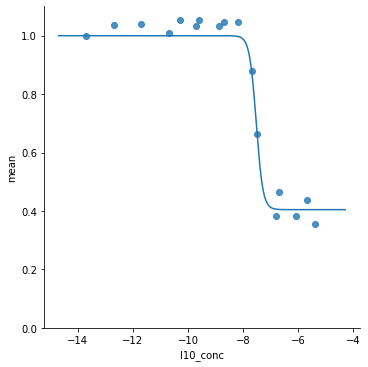

In [ ]:
a = sns.lmplot(x='l10_conc', y='mean', data=m, fit_reg=False)
a.set(ylim=(0, 1.1))
sns.lineplot(x=[i for i in myconc], y=[viability(10**i,*fitCoefs) for i in myconc], legend=False)

In [ ]:
fitCoefs

array([3.57228474e+00, 4.04706658e-01, 2.95996689e-08])